In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle,islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import Ridge
from google.colab import files



%matplotlib inline


In [ ]:


data = pd.read_csv('report.csv', index_col="DATE")

print(data.shape)
data.head(40)

(209, 20)


,STATION,NAME,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,DX70,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,,,
2000-01,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,0.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,75.8,NaN
2000-02,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,1.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,76.5,NaN
2000-03,IN019131301,"JAIPUR SANGANER, IN",NaN,261.0,NaN,NaN,0.0,0.0,0.0,30.0,13.0,53.0,NaN,103.0,NaN,0.0,NaN,75.2,90.2,60.1
2000-05,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.0,29.0,NaN,NaN,112.0,NaN,NaN,NaN,NaN,106.0,NaN
2000-06,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.0,29.0,NaN,NaN,108.0,NaN,NaN,NaN,NaN,104.1,NaN
2000-07,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,21.0,NaN,NaN,106.0,NaN,NaN,NaN,NaN,95.1,NaN
2000-08,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,23.0,NaN,NaN,98.0,NaN,NaN,NaN,NaN,92.2,NaN
2000-09,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,30.0,30.0,NaN,NaN,99.0,NaN,NaN,NaN,NaN,95.0,NaN
2000-10,IN019131301,"JAIPUR SANGANER, IN",NaN,501.0,NaN,NaN,0.0,0.0,0.0,30.0,30.0,61.0,NaN,100.0,NaN,0.0,NaN,83.6,98.0,69.2


In [ ]:
data.loc['2000-01':"2000-03",:]

,STATION,NAME,CDSD,CLDD,DP01,DP10,DT00,DT32,DX32,DX70,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,,,
2000-01,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,0.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,75.8,NaN
2000-02,IN019131301,"JAIPUR SANGANER, IN",NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.0,1.0,NaN,NaN,92.0,NaN,NaN,NaN,NaN,76.5,NaN
2000-03,IN019131301,"JAIPUR SANGANER, IN",NaN,261.0,NaN,NaN,0.0,0.0,0.0,30.0,13.0,53.0,NaN,103.0,NaN,0.0,NaN,75.2,90.2,60.1


In [ ]:
data.apply(pd.isnull).sum()/data.shape[0]

,0
STATION,0.000000
NAME,0.000000
CDSD,0.928230
CLDD,0.684211
DP01,0.842105
DP10,0.842105
DT00,0.430622
DT32,0.430622
DX32,0.129187
DX70,0.129187


In [ ]:
data.shape[1]

20

In [ ]:
core_data=data[["PRCP","HTDD","TMAX","TMIN"]].copy()

In [ ]:
core_data#a sub dataframe


,PRCP,HTDD,TMAX,TMIN
DATE,,,,
2000-01,NaN,NaN,75.8,NaN
2000-02,NaN,NaN,76.5,NaN
2000-03,NaN,0.0,90.2,60.1
2000-05,NaN,NaN,106.0,NaN
2000-06,NaN,NaN,104.1,NaN
...,...,...,...,...
2022-08,NaN,NaN,90.6,NaN
2022-12,NaN,NaN,NaN,50.3
2023-02,NaN,NaN,NaN,56.2


In [ ]:
core_data.columns=['precipitation','HTDD','max.temperature','min.temperature']#rename the columns of core_data dataframe
core_data

,precipitation,HTDD,max.temperature,min.temperature
DATE,,,,
2000-01,NaN,NaN,75.8,NaN
2000-02,NaN,NaN,76.5,NaN
2000-03,NaN,0.0,90.2,60.1
2000-05,NaN,NaN,106.0,NaN
2000-06,NaN,NaN,104.1,NaN
...,...,...,...,...
2022-08,NaN,NaN,90.6,NaN
2022-12,NaN,NaN,NaN,50.3
2023-02,NaN,NaN,NaN,56.2


In [ ]:
core_data.apply(pd.isnull).sum()/core_data.shape[0]

,0
precipitation,0.842105
HTDD,0.684211
max.temperature,0.129187
min.temperature,0.430622


In [ ]:
core_data['precipitation'].value_counts()#gives count of a particular value of a

,count
precipitation,
0.00,15
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data[pd.isnull(core_data['precipitation'])]

,precipitation,HTDD,max.temperature,min.temperature
DATE,,,,
2000-01,NaN,NaN,75.8,NaN
2000-02,NaN,NaN,76.5,NaN
2000-03,NaN,0.0,90.2,60.1
2000-05,NaN,NaN,106.0,NaN
2000-06,NaN,NaN,104.1,NaN
...,...,...,...,...
2022-08,NaN,NaN,90.6,NaN
2022-12,NaN,NaN,NaN,50.3
2023-02,NaN,NaN,NaN,56.2


In [ ]:
del core_data['HTDD']
core_data

,precipitation,max.temperature,min.temperature
DATE,,,
2000-01,NaN,75.8,NaN
2000-02,NaN,76.5,NaN
2000-03,NaN,90.2,60.1
2000-05,NaN,106.0,NaN
2000-06,NaN,104.1,NaN
...,...,...,...
2022-08,NaN,90.6,NaN
2022-12,NaN,NaN,50.3
2023-02,NaN,NaN,56.2


In [ ]:
core_data[pd.isnull(core_data['precipitation'])]

,precipitation,max.temperature,min.temperature
DATE,,,
2000-01,NaN,75.8,NaN
2000-02,NaN,76.5,NaN
2000-03,NaN,90.2,60.1
2000-05,NaN,106.0,NaN
2000-06,NaN,104.1,NaN
...,...,...,...
2022-08,NaN,90.6,NaN
2022-12,NaN,NaN,50.3
2023-02,NaN,NaN,56.2


In [ ]:
core_data.loc["2000-01":"2024-01",:]

,precipitation,max.temperature,min.temperature
DATE,,,
2000-01,NaN,75.8,NaN
2000-02,NaN,76.5,NaN
2000-03,NaN,90.2,60.1
2000-05,NaN,106.0,NaN
2000-06,NaN,104.1,NaN
...,...,...,...
2022-08,NaN,90.6,NaN
2022-12,NaN,NaN,50.3
2023-02,NaN,NaN,56.2


In [ ]:
core_data["precipitation"].value_counts()

,count
precipitation,
0.00,15
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data["precipitation"]=core_data["precipitation"].fillna(0)
core_data["precipitation"]
core_data["precipitation"].value_counts()

,count
precipitation,
0.00,191
10.59,1
21.24,1
5.63,1
17.09,1
2.60,1
0.08,1
0.03,1
0.02,1


In [ ]:
core_data=core_data.fillna(method="ffill")
#core_data[pd.isnull(core_data["min.temperature"])]
#core_data["min.temperature"].fillna(0)

<ipython-input-19-ba41b76cae71>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_data=core_data.fillna(method="ffill")


In [ ]:
core_data.apply(pd.isnull).sum()/core_data.shape[0]


,0
precipitation,0.000000
max.temperature,0.000000
min.temperature,0.009569


In [ ]:
core_data.dtypes

,0
precipitation,float64
max.temperature,float64
min.temperature,float64


In [ ]:
core_data.index

Index(['2000-01', '2000-02', '2000-03', '2000-05', '2000-06', '2000-07',
       '2000-08', '2000-09', '2000-10', '2000-11',
       ...
       '2020-11', '2020-12', '2021-01', '2022-05', '2022-07', '2022-08',
       '2022-12', '2023-02', '2023-11', '2023-12'],
      dtype='object', name='DATE', length=209)

In [ ]:
core_data.index=pd.to_datetime(core_data.index)
core_data.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2020-11-01', '2020-12-01', '2021-01-01', '2022-05-01',
               '2022-07-01', '2022-08-01', '2022-12-01', '2023-02-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='DATE', length=209, freq=None)

In [ ]:
core_data.index.month

Index([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11,
       ...
       11, 12,  1,  5,  7,  8, 12,  2, 11, 12],
      dtype='int32', name='DATE', length=209)

In [ ]:
core_data.apply(lambda x: (x==75.8).sum())

,0
precipitation,0
max.temperature,2
min.temperature,0


<Axes: xlabel='DATE'>

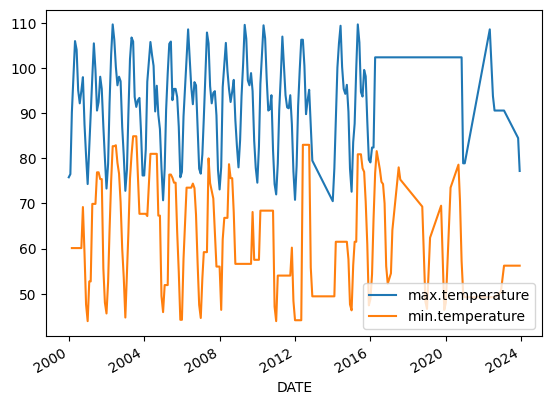

In [ ]:
core_data[["max.temperature","min.temperature"]].plot()

In [ ]:
core_data.index.year.value_counts()

,count
DATE,
2001,12
2002,12
2003,12
2005,12
2015,12
2014,12
2008,12
2009,12
2012,12


In [ ]:
core_data.index.year.value_counts().sort_index()

,count
DATE,
2000,11
2001,12
2002,12
2003,12
2004,11
2005,12
2006,11
2007,11
2008,12


<Axes: xlabel='DATE'>

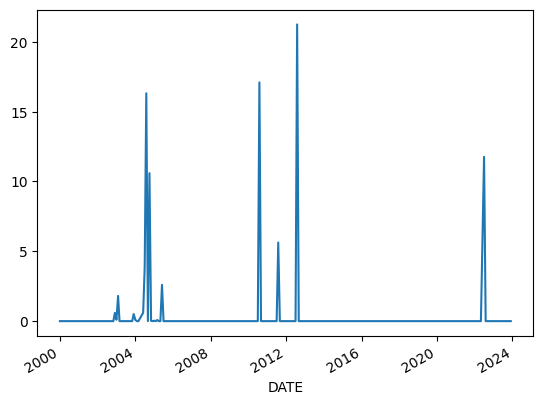

In [ ]:
core_data["precipitation"].plot()

In [ ]:
core_data.groupby(core_data.index.year)apply

SyntaxError: invalid syntax (<ipython-input-30-6e332f97c469>, line 1)

In [ ]:
core_data.groupby(core_data.index.year).sum()

,precipitation,max.temperature,min.temperature
DATE,,,
2000,0.00,1001.0,536.3
2001,0.00,1094.1,767.2
2002,0.59,1122.7,825.0
2003,2.42,1088.2,853.0
2004,31.89,1005.0,791.7
2005,2.71,1089.5,742.0
2006,0.00,1024.3,715.4
2007,0.00,1004.3,690.5
2008,0.00,1104.2,775.9


In [ ]:
core_data["target"]=core_data.shift(-1)["max.temperature"]
core_data

,precipitation,max.temperature,min.temperature,target
DATE,,,,
2000-01-01,0.0,75.8,NaN,76.5
2000-02-01,0.0,76.5,NaN,90.2
2000-03-01,0.0,90.2,60.1,106.0
2000-05-01,0.0,106.0,60.1,104.1
2000-06-01,0.0,104.1,60.1,95.1
...,...,...,...,...
2022-08-01,0.0,90.6,49.2,90.6
2022-12-01,0.0,90.6,50.3,90.6
2023-02-01,0.0,90.6,56.2,84.5


In [ ]:


core_data["min.temperature"] = core_data["min.temperature"].fillna(0) #Assign the result of fillna back to the column
core_data["max.temperature"] = core_data["max.temperature"].fillna(0) #Assign the result of fillna back to the column
core_data["target"] = core_data["target"].fillna(0) #Assign the result of fillna back to the column
reg=Ridge(alpha=.1)
train=core_data.loc[:"2018-01-01"]
test=core_data.loc["2019-01-01":]
predictors=["precipitation","max.temperature","min.temperature"]
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions=reg.predict(test[predictors])
from sklearn.metrics import mean_absolute_error
predictions

array([101.34424676, 100.32389571,  99.86538353, 101.35716259,
       101.2538359 ,  99.60706681,  99.27771299,  99.80080435,
       100.65970745,  82.74799109,  82.80611236, 106.02295437,
        95.44349396,  91.95214103,  91.88110393,  91.50008677,
        86.73164447,  81.02514794])

In [ ]:
mean_absolute_error(test["target"],predictions)

10.279336112003083

In [ ]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined

,target,0
DATE,,
2019-01-01,102.4,101.344247
2019-03-01,102.4,100.323896
2019-10-01,102.4,99.865384
2019-12-01,102.4,101.357163
2020-01-01,102.4,101.253836
2020-04-01,102.4,99.607067
2020-09-01,102.4,99.277713
2020-10-01,102.4,99.800804
2020-11-01,78.9,100.659707


<Axes: xlabel='DATE'>

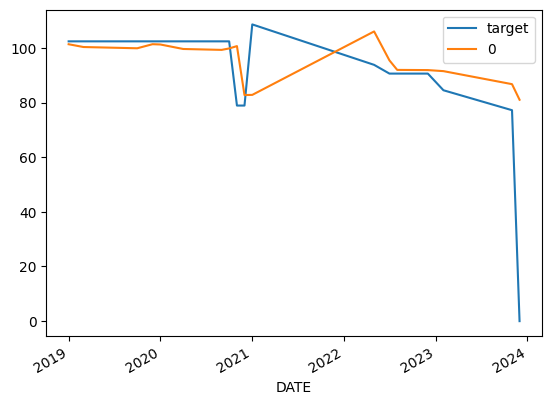

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([ 0.08417304,  0.78171185, -0.06457918])

In [ ]:
def create_predictions(predictors,core_data,reg):
  train=core_data.loc[:"2018-01-01"]
  test=core_data.loc["2019-01-01":]
  reg.fit(train[predictors],train["target"])
  predictors=reg.predict(test[predictors])
  error=mean_absolute_error(test["target"],predictions)
  combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
  combined.colums=["actual","predictions"]
  combined.colums=["actual","predictions"]

  return error,combined

In [ ]:
core_data["month_max"]=core_data["max.temperature"].rolling(5).mean()
core_data

,precipitation,max.temperature,min.temperature,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
2000-07-01,0.0,95.1,60.1,92.2,NaN,0.992429,1.582363,95.100000,95.100000
2000-08-01,0.0,92.2,60.1,95.0,NaN,1.057701,1.534110,92.200000,92.200000
2000-09-01,0.0,95.0,60.1,98.0,NaN,1.036632,1.580699,95.000000,95.000000
2000-10-01,0.0,98.0,69.2,87.5,NaN,0.988571,1.416185,98.000000,98.000000
2000-11-01,0.0,87.5,58.9,80.6,93.56,1.069257,1.485569,87.500000,87.500000
...,...,...,...,...,...,...,...,...,...
2022-08-01,0.0,90.6,49.2,90.6,90.16,0.995143,1.841463,93.733333,93.838462
2022-12-01,0.0,90.6,50.3,90.6,92.50,1.020971,1.801193,82.600000,82.135714
2023-02-01,0.0,90.6,56.2,84.5,94.84,1.046799,1.612100,82.794118,82.794118


In [ ]:
core_data["month_day_max"]=core_data["month_max"]/core_data["max.temperature"]

In [ ]:
core_data["max_min"]=core_data["max.temperature"]/core_data["min.temperature"]

In [ ]:
predictors=["precipitation","max.temperature","min.temperature","month_max","month_day_max","max_min"]

In [ ]:
core_data=core_data.iloc[5:,:].copy()

In [ ]:
error,combined=create_predictions(predictors,core_data,reg)

<ipython-input-87-4f34b74fbb2d>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  combined.colums=["actual","predictions"]


In [ ]:
error


10.279336112003083

<Axes: xlabel='DATE'>

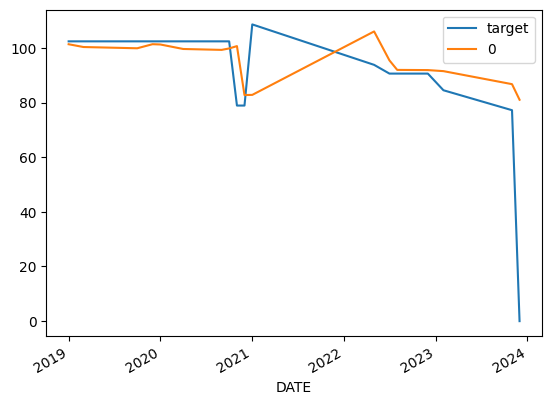

In [ ]:
combined.plot()

In [ ]:
core_data["monthly_avg"]=core_data["max.temperature"].groupby(core_data.index.month).transform(lambda x:x.expanding(1).mean())
core_data


,precipitation,max.temperature,min.temperature,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
2000-07-01,0.0,95.1,60.1,92.2,94.38,0.992429,1.582363,95.100000
2000-08-01,0.0,92.2,60.1,95.0,97.52,1.057701,1.534110,92.200000
2000-09-01,0.0,95.0,60.1,98.0,98.48,1.036632,1.580699,95.000000
2000-10-01,0.0,98.0,69.2,87.5,96.88,0.988571,1.416185,98.000000
2000-11-01,0.0,87.5,58.9,80.6,93.56,1.069257,1.485569,87.500000
...,...,...,...,...,...,...,...,...
2022-08-01,0.0,90.6,49.2,90.6,90.16,0.995143,1.841463,93.733333
2022-12-01,0.0,90.6,50.3,90.6,92.50,1.020971,1.801193,82.600000
2023-02-01,0.0,90.6,56.2,84.5,94.84,1.046799,1.612100,82.794118


In [ ]:

core_data["day_of_year_avg"]=core_data["max.temperature"].groupby(core_data.index.day_of_year).transform(lambda x:x.expanding(1).mean())

In [ ]:
predictors=["precipitation","max.temperature","min.temperature","month_max","month_day_max","max_min","day_of_year_avg","monthly_avg"]

In [ ]:
error,combined=create_predictions(predictors,core_data,reg)
error

<ipython-input-52-9cbaca4fdaca>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  combined.colums=["actual","predictions"]


10.279336112003083

<Axes: xlabel='DATE'>

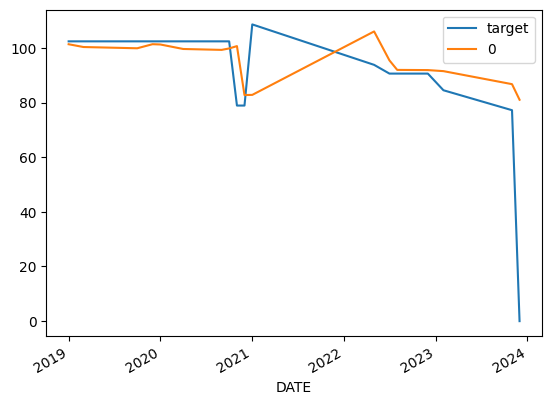

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([ 3.00982064e-01,  5.61240558e-01,  4.81245612e-01, -4.12057359e-01,
       -2.94277392e+01,  1.62439347e+01, -8.85828165e-03, -3.11762532e-01])

In [ ]:
core_data.corr()["target"]

,target
precipitation,-0.007614
max.temperature,0.660468
min.temperature,0.334841
target,1.000000
month_max,0.086360
month_day_max,-0.686495
max_min,0.097390
monthly_avg,0.565307
day_of_year_avg,0.572473


In [ ]:
combined["predictions"]=predictions
combined["diff"]=(combined["target"]-combined["predictions"]).abs()

In [ ]:
combined.sort_values("diff",ascending=False).head()

,target,0,predictions,diff
DATE,,,,
2023-12-01,0.0,81.025148,81.025148,81.025148
2021-01-01,108.6,82.806112,82.806112,25.793888
2020-11-01,78.9,100.659707,100.659707,21.759707
2022-05-01,93.8,106.022954,106.022954,12.222954
2023-11-01,77.2,86.731644,86.731644,9.531644
